In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


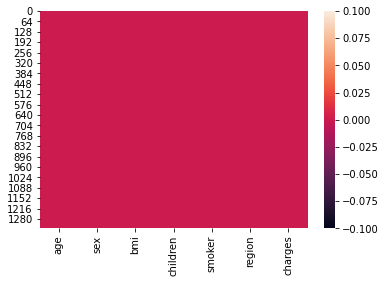

In [4]:
import seaborn as sns
sns.heatmap(df.isna())
plt.show()

#### There is no null values which is good

In [5]:
### Basic info of dataset
print ("Shape")
print (df.shape)
print ("\n")
print ("Colunms")
print (df.columns)

Shape
(1338, 7)


Colunms
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
print ("Datatypes")
print (df.dtypes)

Datatypes
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
### Cheaking distribution of Cont.. values

Text(0.5, 1.0, 'Distribution of Charges')

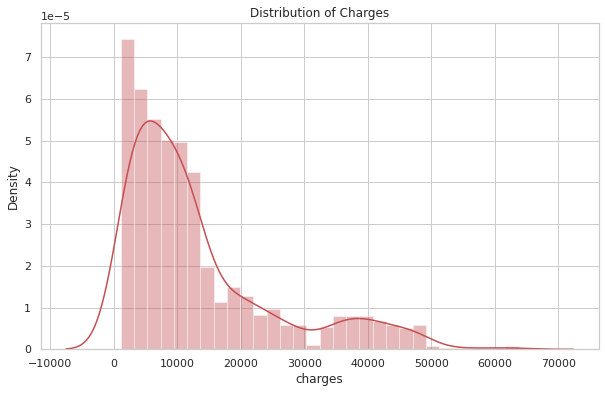

In [8]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(10, 6))
ax = sns.distplot(df['charges'], kde = True, color = 'r')
plt.title('Distribution of Charges')

In [9]:
## Charges is left-skew so we will try to fix it by applying log arth or other

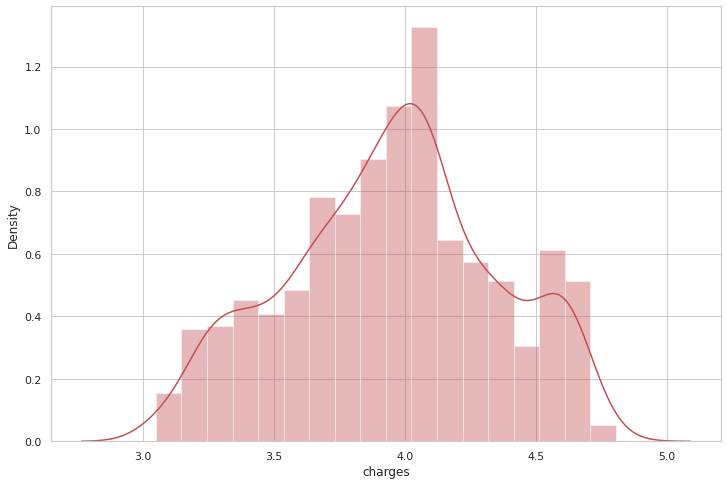

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

In [11]:
# this one os better then previous one

In [12]:
## Creating fucntion of cheaking it
import scipy.stats as stat
import pylab

In [13]:
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

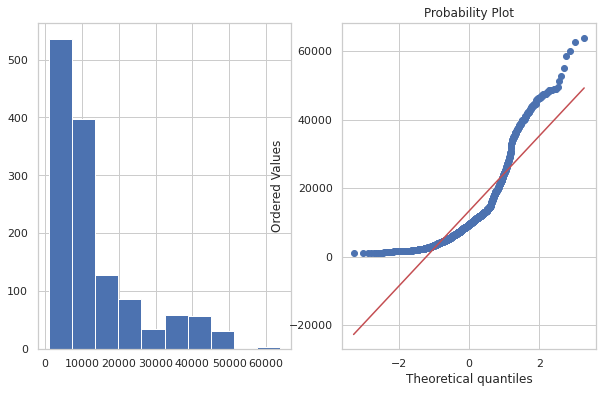

In [14]:
plot_data(df, "charges")

In [15]:
df["Charges_log"] = np.log10(df.charges)

In [16]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges,Charges_log
0,19,female,27.90,0,yes,southwest,16884.9240,4.227499
1,18,male,33.77,1,no,southeast,1725.5523,3.236928
2,28,male,33.00,3,no,southeast,4449.4620,3.648308


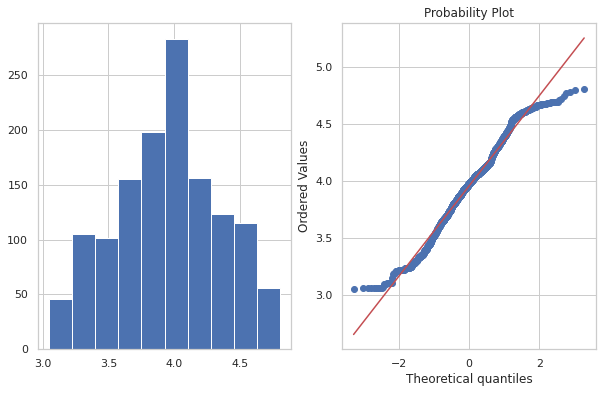

In [17]:
plot_data(df, "Charges_log")

In [18]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,Charges_log
0,19,female,27.90,0,yes,southwest,16884.9240,4.227499
1,18,male,33.77,1,no,southeast,1725.5523,3.236928


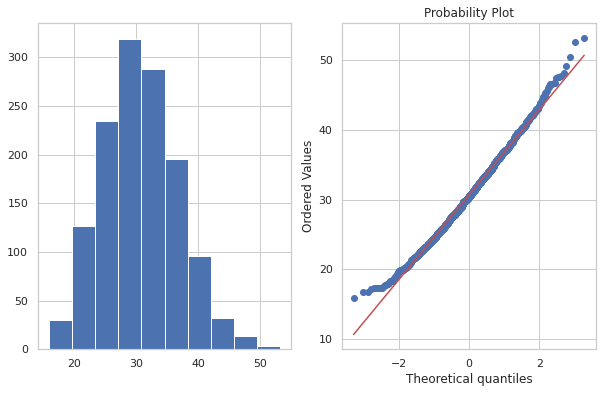

In [19]:
plot_data(df,"bmi")

In [20]:
## Bmi shows perfect result we dnt have to change it

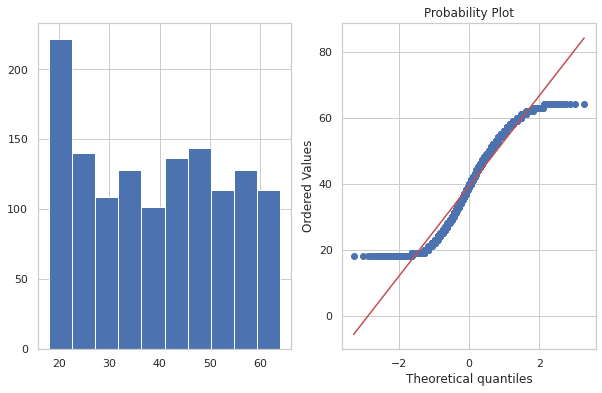

In [21]:
plot_data(df,"age")

In [22]:
## Region

In [23]:
df.Charges_log.groupby(df.region).sum().sort_values(ascending = True)

region
southwest    1274.700737
northwest    1280.153927
northeast    1290.150345
southeast    1442.098350
Name: Charges_log, dtype: float64

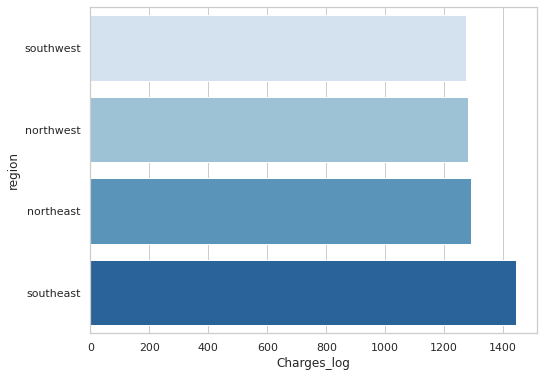

In [24]:
charges = df['Charges_log'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

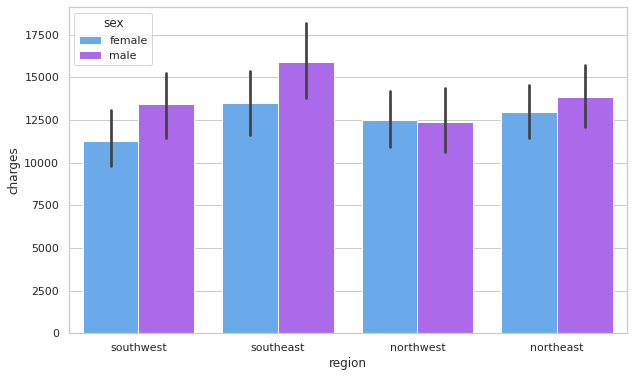

In [25]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

In [26]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes


age               int64
sex            category
bmi             float64
children          int64
smoker         category
region         category
charges         float64
Charges_log     float64
dtype: object

In [27]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges,Charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,4.227499
1,18,male,33.770,1,no,southeast,1725.55230,3.236928
2,28,male,33.000,3,no,southeast,4449.46200,3.648308
3,33,male,22.705,0,no,northwest,21984.47061,4.342116


In [28]:
df["sex"] = pd.get_dummies(df["sex"], drop_first=True)

In [29]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,Charges_log
0,19,0,27.90,0,yes,southwest,16884.9240,4.227499
1,18,1,33.77,1,no,southeast,1725.5523,3.236928


In [30]:
df = pd.concat([df, pd.get_dummies(df["region"], drop_first=True)], axis=1)

In [31]:
df.drop("region", axis=1, inplace=True)

In [32]:
df.head(3)

,age,sex,bmi,children,smoker,charges,Charges_log,northwest,southeast,southwest
0,19,0,27.90,0,yes,16884.9240,4.227499,0,0,1
1,18,1,33.77,1,no,1725.5523,3.236928,0,1,0
2,28,1,33.00,3,no,4449.4620,3.648308,0,1,0


In [37]:
df["smoker"] = pd.get_dummies(df["smoker"], drop_first=True)

In [38]:
df.head(3)

,age,sex,bmi,children,smoker,charges,Charges_log,northwest,southeast,southwest
0,19,0,27.90,0,1,16884.9240,4.227499,0,0,1
1,18,1,33.77,1,0,1725.5523,3.236928,0,1,0
2,28,1,33.00,3,0,4449.4620,3.648308,0,1,0


In [39]:
## Cheaking outliner

<AxesSubplot:xlabel='age'>

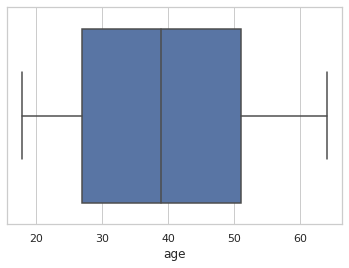

In [40]:
import seaborn as snn
sns.boxplot(df["age"])

<AxesSubplot:xlabel='bmi'>

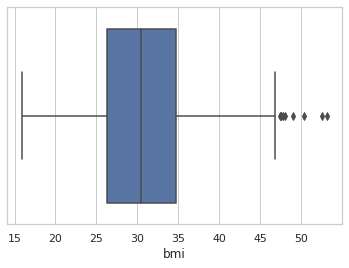

In [41]:
sns.boxplot(df.bmi)

In [43]:
upper_boundry = df.bmi.mean() + 3*df.bmi.std()

In [45]:
bmiIQR = df.bmi.quantile(0.75) - df.bmi.quantile(0.25)

In [47]:
bmi_upper_bridge = df.bmi.quantile(0.75) + (bmiIQR*3)

In [48]:
bmi_upper_bridge

59.886250000000004

In [51]:
df.loc[df["bmi"]>upper_boundry, 'bmi'] = upper_boundry

<AxesSubplot:xlabel='bmi'>

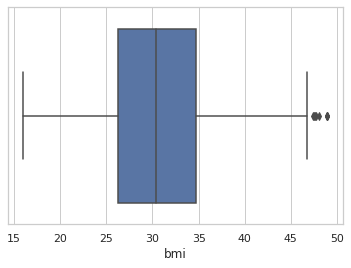

In [52]:
sns.boxplot(df.bmi)

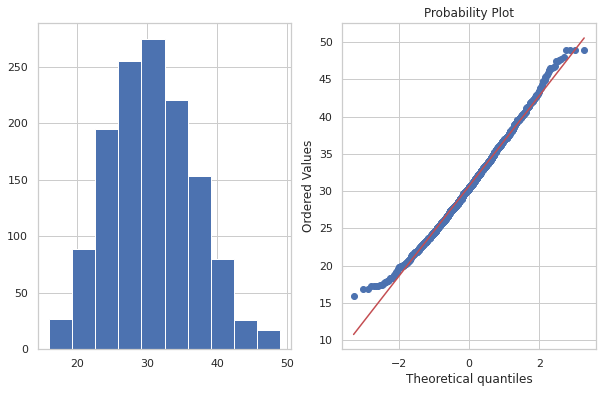

In [54]:
plot_data(df,"bmi")

<AxesSubplot:xlabel='age'>

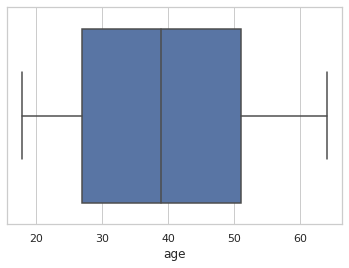

In [55]:
sns.boxplot(df.age)

## Treaning model

In [56]:
df.head(2)

,age,sex,bmi,children,smoker,charges,Charges_log,northwest,southeast,southwest
0,19,0,27.90,0,1,16884.9240,4.227499,0,0,1
1,18,1,33.77,1,0,1725.5523,3.236928,0,1,0


In [57]:
df.drop("charges", axis=1)
X = df.drop("Charges_log", axis=1);
y = df.Charges_log

In [59]:
from sklearn.model_selection import train_test_split as holdout
X_train, X_test, y_train, y_test = holdout(X, y, test_size=0.2, random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_test, y_test)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

In [73]:
# print(model.intercept_)
# print(model.coef_)/
print(model.score(X_test, y_test))

0.8991587145455112
